In [124]:
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import datetime
import yfinance as yf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

NameError: name 'ARIMA_DEPRECATION_WARN' is not defined

In [108]:
NUM_DAYS = 10000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
start = "2015-01-01"
end = datetime.datetime.today()
df = yf.download('aapl', start = start, end = end, interval = INTERVAL).reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.714512,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.018259,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.020527,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.357340,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.293209,237458000


In [109]:
print(df.head())
print(df.shape)
print(df.columns)

        Date       Open       High        Low      Close  Adj Close     Volume
0 2015-01-02  27.847500  27.860001  26.837500  27.332500  24.714512  212818400
1 2015-01-05  27.072500  27.162500  26.352501  26.562500  24.018259  257142000
2 2015-01-06  26.635000  26.857500  26.157499  26.565001  24.020527  263188400
3 2015-01-07  26.799999  27.049999  26.674999  26.937500  24.357340  160423600
4 2015-01-08  27.307501  28.037500  27.174999  27.972500  25.293209  237458000
(1831, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Text(0.5, 1.0, 'BKKT Autocorrelation plot')

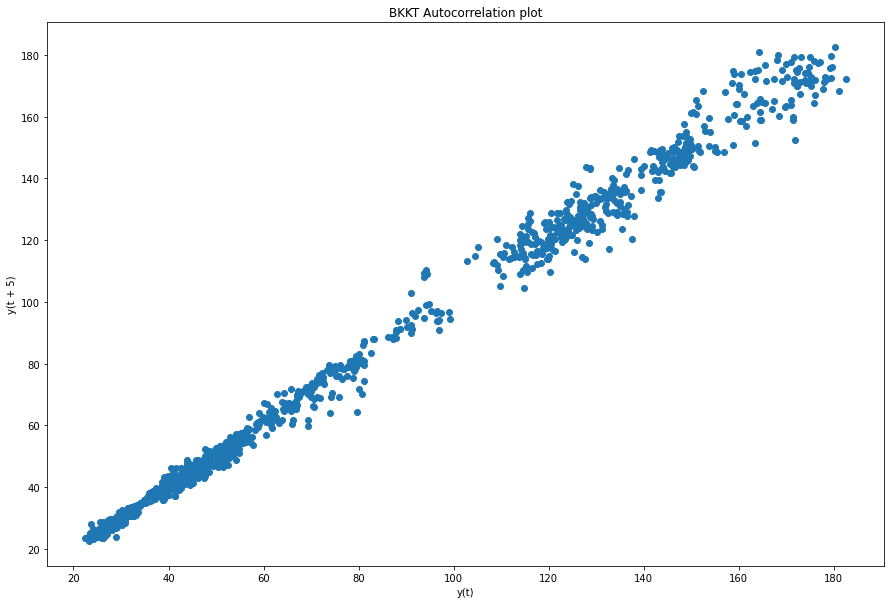

In [110]:
plt.figure(figsize=(15,10))
lag_plot(df['Open'],lag=5)
plt.title("BKKT Autocorrelation plot")

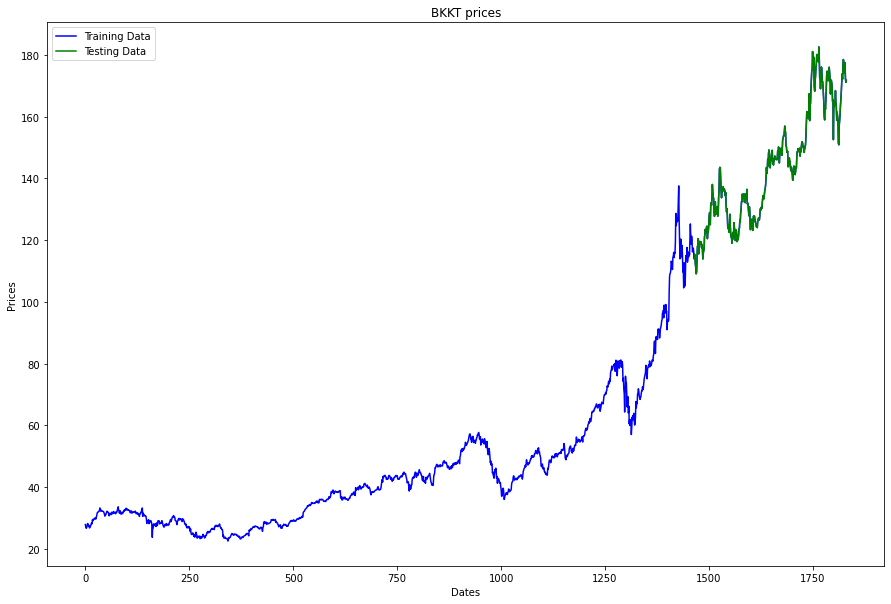

In [111]:
train_data, test_data = df[0:int(len(df)*0.8)],df[int(len(df)*0.8):]
plt.figure(figsize=(15,10))
plt.title("BKKT prices")
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'],'blue', label='Training Data')
plt.plot(test_data['Open'],'green', label='Testing Data')

plt.legend()

In [112]:
def smape_kun(y_true,y_pred):
    return np.mean((np.abs(y_pred-y_true)*200/(np.abs(y_pred)+np.abs(y_true))))

In [123]:

train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

train_ar = np.nan_to_num(train_ar)
test_ar = np.nan_to_num(test_ar)

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.ARIMA(endog=history, order=(5,1,0))
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

error = mean_squared_error(test_ar, predictions)
print('Teting Mean Squared Error: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print("Symmetric mean absolute percentage error: %.3f" % error2)




/Users/tyler._.bui/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Teting Mean Squared Error: 6.937
Symmetric mean absolute percentage error: 14.586


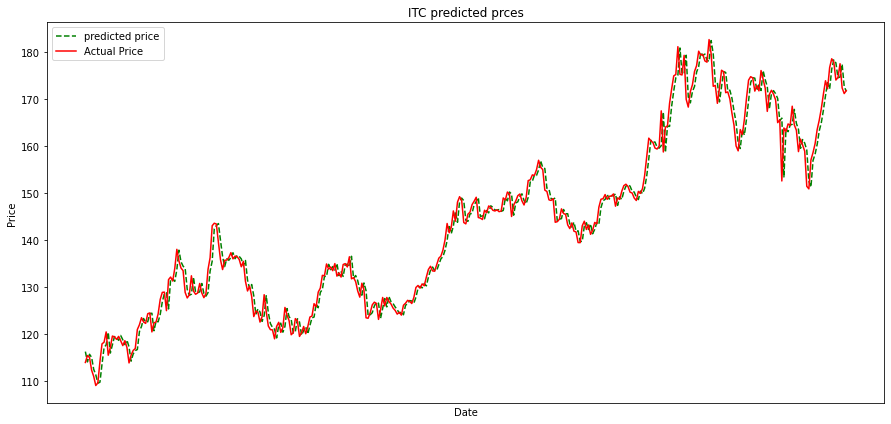

In [114]:
plt.figure(figsize = (15,7))
plt.plot(test_data.index,predictions, color="green", linestyle='dashed',label='predicted price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,100,90),df['Date'][1486:100:90])
plt.title('ITC predicted prces')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [116]:
model = sm.tsa.ARIMA(endog=history, order=(5,1,0))
model_fit = model.fit(disp=False)
output = model_fit.forecast()

/Users/tyler._.bui/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [117]:
print(output)

(array([172.05719301]), array([1.58387621]), array([[168.95285269, 175.16153334]]))
